## 1、地理/逆地理
* 地理编码/逆地理编码API是通过HTTP/HTTPS协议访问远程服务的接口，提供结构化地址与经纬度之间的相互转化的能力。

In [1]:
import requests # 用于api http request
# api使用请求参数
key = 'ddbf84e30516af49ba00bd1afa61a233'
def geo(address:str,city=None)-> dict:
    parameters = {'key':key,
                 'city':city,
                 'citylimit': True,
                 'address':address
                 }
    r = requests.get ("https://restapi.amap.com/v3/geocode/geo?parameters", params=parameters)
    data = r.json()['geocodes'][0]['location']
    return data

In [2]:
geo("广东省广州市从化区中山大学南方学院","广州")

'113.679287,23.632575'

In [3]:
geo("广东省广州市从化区温泉镇政府","广州")

'113.632401,23.616941'

## 2、路径规划
* 路径规划API是一套以HTTP形式提供的步行、公交、驾车查询及行驶距离就散接口、返回JSON或XML格式的查询数据，用于实现路径规划功能的开发。

In [4]:
def bicycling(origin,destination,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/walking?parameters'
    params = {
        'key':key,
        'origin':origin,
        'destination':destination,
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data


In [5]:
bicycling(geo("广东省广州市从化区中山大学南方学院","广州"),geo ("广东省广州市从化区温泉镇政府","广州"))

{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'count': '1',
 'route': {'origin': '113.679287,23.632575',
  'destination': '113.632401,23.616941',
  'paths': [{'distance': '6759',
    'duration': '5407',
    'steps': [{'instruction': '向南步行161米右转',
      'orientation': '南',
      'road': [],
      'distance': '161',
      'duration': '129',
      'polyline': '113.679592,23.632088;113.679609,23.631003;113.679609,23.631003;113.679609,23.630877;113.67964,23.630638',
      'action': '右转',
      'assistant_action': [],
      'walk_type': '0'},
     {'instruction': '向西步行99米左转',
      'orientation': '西',
      'road': [],
      'distance': '99',
      'duration': '79',
      'polyline': '113.67964,23.630634;113.679362,23.630521;113.679201,23.630473;113.679201,23.630473;113.679032,23.63043;113.679032,23.63043;113.67888,23.630404;113.67888,23.630404;113.678711,23.630365',
      'action': '左转',
      'assistant_action': [],
      'walk_type': '0'},
     {'instruction': '向南步行237米左转',
      

## 3、行政区域查询
* 行政区域查询是一类简单的HTTP接口，根据用户输入的搜索条件可以帮助用户快速的查找特定的行政区域信息。

In [6]:
def district(keywords,subdistrict=None,page=None,offset=None,extensions='base',filter=None)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params = {
        'key':key,
        'keywords':keywords,
        'subdistrict':subdistrict,
        'page':page,
        'offset':offset,
        'extensions':extensions,
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [7]:
district ('广东')

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'suggestion': {'keywords': [], 'cities': []},
 'districts': [{'citycode': [],
   'adcode': '440000',
   'name': '广东省',
   'center': '113.280637,23.125178',
   'level': 'province',
   'districts': [{'citycode': '0758',
     'adcode': '441200',
     'name': '肇庆市',
     'center': '112.472529,23.051546',
     'level': 'city',
     'districts': []},
    {'citycode': '0757',
     'adcode': '440600',
     'name': '佛山市',
     'center': '113.122717,23.028762',
     'level': 'city',
     'districts': []},
    {'citycode': '0754',
     'adcode': '440500',
     'name': '汕头市',
     'center': '116.708463,23.37102',
     'level': 'city',
     'districts': []},
    {'citycode': '0752',
     'adcode': '441300',
     'name': '惠州市',
     'center': '114.412599,23.079404',
     'level': 'city',
     'districts': []},
    {'citycode': '0755',
     'adcode': '440300',
     'name': '深圳市',
     'center': '114.085947,22.547',
     'level': 'ci

## 4、搜索POI
* 搜索服务API是一类简单的HTTP接口，提供多种查询POI信息的能力，其中包括关键字搜索、多变形搜索、ID查询四种筛选机制。

In [8]:
def poi(keywords:str,city:str)-> dict:
    parameters = {
        'key':key,
        'city':city,
        'keywords':keywords,
        'output':'json'
    }
    r = requests.get ("https://restapi.amap.com/v3/place/text?parameters", params=parameters)
    data = r.json()
    pois = []
    pois.extend(data['pois'])
    import pandas as pd
    df_input = pd.DataFrame(pois)
    return df_input

In [9]:
data = poi("麦当劳","广东")
data

,id,parent,childtype,name,type,typecode,biz_type,address,location,tel,distance,biz_ext,pname,cityname,adname,importance,shopid,shopinfo,poiweight,photos
0,B0FFIJPVMU,[],[],麦当劳,餐饮服务;快餐厅;麦当劳,050302,diner,九龙镇中新知识城九龙大道西侧ZSCN-B1-2号,"113.541641,23.333302",020-89854139,[],"{'rating': '3.5', 'cost': '29.00', 'meal_order...",广东省,广州市,黄埔区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...
1,B0FFIRCRJ9,B0FFIPT5GV,202,麦当劳,餐饮服务;餐饮相关场所;餐饮相关,050000,diner,中央公园附近,"113.387812,22.931549",020-31563770,[],"{'rating': '4.5', 'cost': '30.00', 'meal_order...",广东省,广州市,番禺区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...
2,B0FFMCOW5F,[],[],麦当劳,餐饮服务;快餐厅;麦当劳,050302,diner,上下九秀丽街名汇中华小吃街旁2楼,"113.243492,23.108045",[],[],"{'rating': [], 'cost': [], 'meal_ordering': '0'}",广东省,广州市,荔湾区,[],[],0,[],[]
3,B0FFJGN3DL,B0FFJMCMJH,202,麦当劳,餐饮服务;快餐厅;麦当劳,050302,diner,新会万达广场1层,"113.046662,22.504894",0750-6666467,[],"{'rating': '4.5', 'cost': '18.00', 'meal_order...",广东省,江门市,新会区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...
4,B0FFKC7BNA,[],[],麦当劳,餐饮服务;快餐厅;麦当劳,050302,diner,棉兴北路与棉新大道交叉口西150米,"116.593750,23.269919",[],[],"{'rating': [], 'cost': [], 'meal_ordering': '0'}",广东省,汕头市,潮阳区,[],[],0,[],[{'url': 'http://aos-cdn-image.amap.com/sns/ug...
5,B0FFLHVJXF,[],[],麦当劳,餐饮服务;快餐厅;麦当劳,050302,diner,新安三路洪浪北地铁站A出口,"113.910636,22.574175",[],[],"{'rating': [], 'cost': [], 'meal_ordering': '0'}",广东省,深圳市,宝安区,[],[],0,[],[]
6,B0FFG1ZUP8,[],[],麦当劳,餐饮服务;快餐厅;麦当劳,050302,diner,凤岗镇油甘埔同兴路,"114.172133,22.715406",[],[],"{'rating': [], 'cost': [], 'meal_ordering': '0'}",广东省,东莞市,东莞市,[],[],0,[],[]
7,B0FFM0JOWM,[],[],麦当劳,餐饮服务;快餐厅;快餐厅,050300,diner,双龙大道73号首层125室商铺,"113.060791,22.603695",[],[],"{'rating': [], 'cost': [], 'meal_ordering': '0'}",广东省,江门市,蓬江区,[],[],0,[],[]
8,B0FFGNZ8RP,[],[],麦当劳,餐饮服务;快餐厅;麦当劳,050302,diner,兰竹苑,"116.603553,23.258734",[],[],"{'rating': [], 'cost': [], 'meal_ordering': '0'}",广东省,汕头市,潮阳区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...
9,B0FFHGRSHA,B0FFFPK5LK,202,麦当劳,餐饮服务;快餐厅;麦当劳,050302,diner,华旺路北150米,"113.994977,22.675617",[],[],"{'rating': [], 'cost': [], 'meal_ordering': '0'}",广东省,深圳市,龙华区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...


## 5、IP定位
* IP定位是一个简单是HTTP接口，根据用户输入的IP地址，能够快速的帮用户定位IP的所在位置

In [10]:
def ip(ip=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/ip?parameters'
    params = {
        'key':key,
        'ip':ip,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [11]:
ip ('116.26.153.153')

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'province': '广东省',
 'city': '汕头市',
 'adcode': '440500',
 'rectangle': '116.6117942,23.28637076;116.8215644,23.45797106'}

## 6、静态地图
* 静态地图服务通过返回一张地图图片响应HTTP请求，使用户能够将高德地图以图片形式嵌入自己的网页中。

In [12]:
from PIL import Image
from io import BytesIO
def map(location,zoom,size=None,scale=1,markers=None,labels=None,paths=None,traffic=0,page=None,sig=None)-> dict:
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':key,
        'location':location,
        'zoom':zoom,
        'size':size,
        'scale':scale,
        'markers':markers,
        'labels':labels,
        'paths':paths,
        'traffic':traffic,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = Image.open(BytesIO(response.content))
    return data

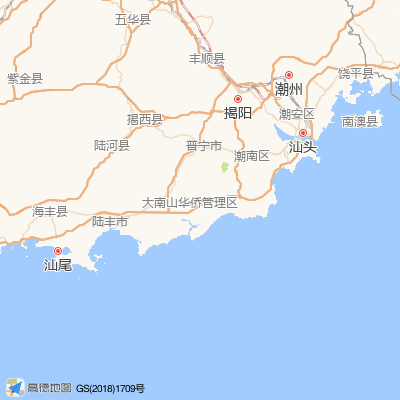

In [13]:
# 汕头位置地图
map(location='116.141172,23.0223',zoom=7)

## 7、坐标转换
* 坐标转换是一类简单的HTTP接口，能够将用户输入的非高德坐标（GPS坐标、mapbar坐标、baidu坐标）转换成高德坐标。

In [14]:
# 将汕头的经纬度转换为GPS坐标
def cs(locations,coordsys=None,sig=None,)-> dict:
    url = 'https://restapi.amap.com/v3/assistant/coordinate/convert?parameters'
    params={
        'key':key,
        'locations':locations,
        'coordsys':coordsys,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [15]:
cs(locations='116.141172,23.0223',coordsys='gps')

{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'locations': '116.145880262587,23.019744737414'}

## 8、天气查询
* 天气查询是一个简单的HTTP接口，根据用户输入的adcode，查询目标区域当前/未来的天气情况。

In [16]:
def tq(city,extensions='base')-> dict:
    url = 'https://restapi.amap.com/v3/weather/weatherInfo?parameters'
    params={
        'key':key,
        'city':city,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [17]:
tq(city='440514')

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'lives': [{'province': '广东',
   'city': '潮南区',
   'adcode': '440514',
   'weather': '阴',
   'temperature': '20',
   'winddirection': '东',
   'windpower': '≤3',
   'humidity': '73',
   'reporttime': '2020-04-23 10:22:34'}]}

## 9、输入提示
* 输入提示是一类简单的HTTP接口，提供根据用户输入的关键词查询返回建议列表。

In [18]:
def sr(keywords,type="分类代码",location=None,city=None,citylimit='false',datatype='all',sig=None)-> dict:
    url = 'https://restapi.amap.com/v3/assistant/inputtips?parameters'
    params={
        'key':key,
        'type':type,
        'keywords':keywords,
        'location':location,
        'city':city,
        'citylimit':citylimit,
        'datatype':datatype,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [19]:
sr(keywords="肯德基",city="440514")

{'status': '1',
 'count': '10',
 'info': 'OK',
 'infocode': '10000',
 'tips': [{'id': [],
   'name': '肯德基',
   'district': [],
   'adcode': [],
   'location': [],
   'address': [],
   'typecode': [],
   'city': []},
  {'id': 'B0FFFSM0KM',
   'name': '肯德基(金湖店)',
   'district': '广东省汕头市金平区',
   'adcode': '440511',
   'location': '116.705794,23.375178',
   'address': '金湖路115号',
   'typecode': '050301',
   'city': []},
  {'id': 'B02F200BFZ',
   'name': '肯德基(金砂店)',
   'district': '广东省汕头市金平区',
   'adcode': '440511',
   'location': '116.701237,23.366089',
   'address': '金砂路44号',
   'typecode': '050301',
   'city': []},
  {'id': 'B02F20O1F5',
   'name': '肯德基(天山南路店)',
   'district': '广东省汕头市龙湖区',
   'adcode': '440507',
   'location': '116.725118,23.377979',
   'address': '天山路55号金书大厦1-2层',
   'typecode': '050301',
   'city': []},
  {'id': 'B02F200ES5',
   'name': '肯德基(明珠店)',
   'district': '广东省汕头市龙湖区',
   'adcode': '440507',
   'location': '116.732016,23.369690',
   'address': '衡山路明珠广场锦龙商业大厦1层',
 

## 10、交通态势
* 交通态势是一类简单的HTTP接口，提供根据用户输入的内容能够返回希望查询的交通态势情况。

In [20]:
def jt(location,level=None,extensions='base',sig=None,radius=None)-> dict:
    url = 'https://restapi.amap.com/v3/traffic/status/circle?parameters'
    params={
        'key':key,
        'location':location,
        'level':level,
        'location':location,
        'extensions':extensions,
        'radius':radius,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data


In [21]:
jt(location='116.3057764,39.98641364',radius='1500')

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '海淀南路：自西向东畅通，反向缓慢；中关村南路：从中关村大街到科学院南路行驶缓慢；丹棱街：创富大厦附近自西向东行驶缓慢；海淀大街：海龙大厦附近自东向西行驶缓慢；善缘街：中国电子大厦附近自东向西行驶缓慢。',
  'evaluation': {'expedite': '90.00%',
   'congested': '10.00%',
   'blocked': '0.00%',
   'unknown': '0.00%',
   'status': '2',
   'description': '轻度拥堵'}}}

## 11、地理围栏
* 地理围栏服务是一类HTTP接口，提供在服务端，增删改查地理围栏的功能，同时支持对于设备与围栏关系进行监控。

In [91]:
# 创建地理围栏
def meta(name=None,center=None,radius="2000",enable="True",valid_time="2020-05-19",repeat="Mon,Tues,Wed,Thur,Fri,Sat,Sun",time="00:00,11:59;13:00,20:59",desc="测试围栏描述",alert_condition="enter;leave")->dict:
    url = 'https://restapi.amap.com/v4/geofence/meta?key=ddbf84e30516af49ba00bd1afa61a233'
    params={
        'key':key,
    }
    data = {
        "name":name,
        "center":center,
        "radius":radius,
        "enable":enable,
        "valid_time":valid_time,
        "repeat":repeat,
        "time":time,
        "desc":desc,
        "alert_condition":alert_condition,
    }
    response = requests.post(url,params=params,json=data)
    data = response.json()
    return data

In [92]:
qu = meta(name='名称',center='116.481498,39.990375')
qu

{'data': {'gid': '96134bad-8b66-4356-98b2-0b234d0eae8e',
  'id': '0',
  'message': '成功',
  'status': '0'},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

## 12、轨迹纠偏
* 根据坐标点抓取道路，即根据给定的坐标点、车辆的方位角以及行驶速度，将用户的轨迹纠偏到路上，从而返回用户实际驾车经过的道路坐标。

In [24]:
def grasproad()-> dict:
    url = 'https://restapi.amap.com/v4/grasproad/driving'
    params={
        'key':key,
    }
    data = [{
"x": 116.449429,
"y": 40.014844,
"sp": 4,
"ag": 110,
"tm": 1478831753
}, {
"x": 116.449639,
"y": 40.014776,
"sp": 3,
"ag": 110,
"tm": 23
}, {
"x": 116.449859,
"y": 40.014716,
"sp": 3,
"ag": 111,
"tm": 33
}, {
"x": 116.450074,
"y": 40.014658,
"sp": 3,
"ag": 110,
"tm": 31
}, {
"x": 116.450273,
"y": 40.014598,
"sp": 3,
"ag": 111,
"tm": 20
}]
    response = requests.post(url,params=params,json=data)
#response.status_code
#response.content
    result = response.json()
    return result

In [25]:
result

NameError: name 'result' is not defined

## 13、批量接口
* 批量接口通过用户传入合并后的请求，同时返回多个请求的顺序集合，目前最多支持20个子请求。

In [26]:
def batch()->dict:
    url = "https://restapi.amap.com/v3/batch?key=ddbf84e30516af49ba00bd1afa61a233"
    headers = {
    'Content-Type':'application/json',
    }
    data = {
    "ops": [
        {
            "url": "/v3/place/around?offset=10&page=1&key=<您的key>&location=116.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
        },
        {
            "url": "/v3/place/around?offset=10&page=1&key=<您的key>&location=118.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
        }
    ]
}
    params = {
        "keyt":key,
    }
    response = requests.post(url,headers=headers,params=params,json=data)
    response.status_code
    #response.content
    #results = response.json()
    return results

In [27]:
results

NameError: name 'results' is not defined